In [49]:
import requests
import json
from pymongo import MongoClient
from pymongo.errors import DuplicateKeyError, CollectionInvalid
import datetime as dt
import time 
import nytimesarticle

# client = MongoClient()
# # Access/Initiate Database
# db = client['test_database']
# # Access/Initiate Table
# tab = db['test_table']

def single_query(link, payload):
    response = requests.get(link, params=payload)
    if response.status_code != 200:
        print ('WARNING', response.status_code)
    else:
        return response.json()

link = 'http://api.nytimes.com/svc/search/v2/articlesearch.json'

payload = {'api-key': '','fq': 'type_of_material:("Front Page")'}
html_str = single_query(link, payload)

In [39]:
# call to get the first article from the nyt api pull
html_str['response']['docs'][0]
# document_type : 'article'

{'_id': '535eaea538f0d82813916aa7',
 'abstract': 'conditions in heatless, rat-infested W 118th St, Harlem, tenement described; illus',
 'blog': {},
 'byline': {'organization': None,
  'original': 'By HOMER BIGART',
  'person': [{'firstname': 'Homer',
    'lastname': 'BIGART',
    'middlename': None,
    'organization': '',
    'qualifier': None,
    'rank': 1,
    'role': 'reported',
    'title': None}]},
 'document_type': 'article',
 'headline': {'content_kicker': None,
  'kicker': None,
  'main': 'HARLEM TENANTS COPE WITH COLD',
  'name': None,
  'print_headline': None,
  'seo': None,
  'sub': None},
 'keywords': [{'major': None,
   'name': 'subject',
   'rank': 1,
   'value': 'HOUSING'},
  {'major': None,
   'name': 'subject',
   'rank': 2,
   'value': 'FIRE-HEALTH HAZARDS'},
  {'major': None, 'name': 'glocations', 'rank': 3, 'value': 'NEW YORK CITY'}],
 'multimedia': [],
 'pub_date': '1964-01-01T00:00:00Z',
 'score': 1.0,
 'snippet': 'conditions in heatless, rat-infested W 118th St

In [22]:
for x in html_str['response']['docs']:
    print (x)
    print ('--')
    print ('--')
    print ('--')
    print ('--')

{'web_url': 'https://www.nytimes.com/1964/01/01/harlem-tenants-cope-with-cold.html', 'snippet': 'conditions in heatless, rat-infested W 118th St, Harlem, tenement described; illus', 'abstract': 'conditions in heatless, rat-infested W 118th St, Harlem, tenement described; illus', 'blog': {}, 'source': 'The New York Times', 'multimedia': [], 'headline': {'main': 'HARLEM TENANTS COPE WITH COLD', 'kicker': None, 'content_kicker': None, 'print_headline': None, 'name': None, 'seo': None, 'sub': None}, 'keywords': [{'name': 'subject', 'value': 'HOUSING', 'rank': 1, 'major': None}, {'name': 'subject', 'value': 'FIRE-HEALTH HAZARDS', 'rank': 2, 'major': None}, {'name': 'glocations', 'value': 'NEW YORK CITY', 'rank': 3, 'major': None}], 'pub_date': '1964-01-01T00:00:00Z', 'document_type': 'article', 'byline': {'original': 'By HOMER BIGART', 'person': [{'firstname': 'Homer', 'middlename': None, 'lastname': 'BIGART', 'qualifier': None, 'title': None, 'role': 'reported', 'organization': '', 'rank':

In [11]:
paylo = {}
q = 'Sports'
string = " ".join(q.split(','))
paylo["fq"] = string+" AND "+"type_of_material:(\"Front Page\")"

In [12]:
paylo

{'fq': 'Sports AND type_of_material:("Front Page")'}

In [66]:
payload = {'api-key': '','fq':'print_page:1 The New York Times AND document_type:("article") ','fl':'section_name,document_type,word_count,type_of_material,keywords,print_page'}
html_str2 = single_query(link, payload)


In [72]:
html_str2['response']['docs'][0]

{'document_type': 'article',
 'keywords': [{'major': 'N',
   'name': 'subject',
   'rank': 1,
   'value': 'Politics and Government'},
  {'major': 'N',
   'name': 'subject',
   'rank': 2,
   'value': 'Government Employees'},
  {'major': 'N', 'name': 'persons', 'rank': 3, 'value': 'Ghani, Ashraf'},
  {'major': 'N', 'name': 'glocations', 'rank': 4, 'value': 'Afghanistan'}],
 'score': 1.0,
 'section_name': 'World',
 'type_of_material': 'News',
 'word_count': 1500}

# print page confirmed to be on front page 
print_page:1
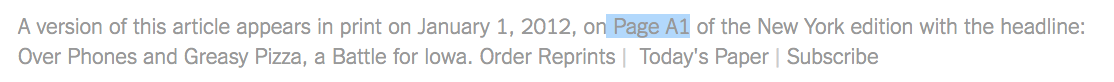
http://www.nytimes.com/2012/01/01/us/politics/republicans-wage-hidden-ground-war-in-iowa.html

In [194]:
#alternate method for query 
from nytimesarticle import articleAPI
api = articleAPI('')
articles = api.search(begin_date = 20170109,end_date=20170110, page=1, source = 'The New York Times',\
                      facet_field='type_of_material',facet_filter=True)
#'fl':'section_name,document_type,word_count,type_of_material,keywords,print_page'
fq = {'headline':'Obama', 'source':['Reuters','AP', 'The New York Times']}

In [195]:
len(articles)

3

In [196]:
len(articles['response']['docs'])

10

In [197]:
articles = articles['response']['docs']

In [201]:
for article in articles:
    for item in article.items():
        print (item,' : ')
    print('------------------------------------------------------------------------------')

('web_url', 'https://www.nytimes.com/2017/01/09/movies/review-one-piece-film-gold-a-frantic-hunt-for-pirate-loot.html')  : 
('snippet', 'This entry in the “One Piece” anime franchise involves the liberation of gamblers on a floating casino complex.')  : 
('print_page', '4')  : 
('blog', {})  : 
('source', 'The New York Times')  : 
('multimedia', [])  : 
('headline', {'main': 'Review: ‘One Piece Film: Gold,’ a Frantic Hunt for Pirate Loot', 'kicker': None, 'content_kicker': None, 'print_headline': 'Buccaneers on the Hunt for Treasure and Liberation', 'name': None, 'seo': None, 'sub': None})  : 
('keywords', [{'name': 'subject', 'value': 'Movies', 'rank': 1, 'major': None}, {'name': 'persons', 'value': 'Miyamoto, Hiroaki', 'rank': 2, 'major': None}])  : 
('pub_date', '2017-01-09T22:40:22+0000')  : 
('document_type', 'article')  : 
('new_desk', 'Culture')  : 
('byline', {'original': 'By ANDY WEBSTER', 'person': [{'firstname': 'Andy', 'middlename': None, 'lastname': 'WEBSTER', 'qualifier':

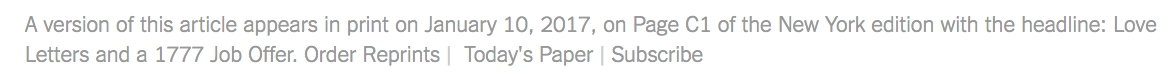
page=1 does not necessarily mean it is a front page article

In [134]:
articles2 = api.search(begin_date = 19640109,end_date=19640110, page=1, source = 'The New York Times',\
                      type_of_material='Front Page',facet_filter=True)

In [135]:
articles2['response']['docs'][0]

{'_id': '536b830838f0d8040ba1ae9f',
 'abstract': "H Schwartz on '63 setbacks",
 'blog': {},
 'byline': {'organization': None,
  'original': 'By HARRY SCHWARTZ',
  'person': [{'firstname': 'Harry',
    'lastname': 'SCHWARTZ',
    'middlename': None,
    'organization': '',
    'qualifier': None,
    'rank': 1,
    'role': 'reported',
    'title': None}]},
 'document_type': 'article',
 'headline': {'content_kicker': None,
  'kicker': None,
  'main': "Communists' Economic Challenge to the West Wanes",
  'name': None,
  'print_headline': None,
  'seo': None,
  'sub': None},
 'keywords': [{'major': None,
   'name': 'glocations',
   'rank': 4,
   'value': 'EUROPE'},
  {'major': None,
   'name': 'subject',
   'rank': 2,
   'value': 'ECONOMY AND FINANCES'},
  {'major': None, 'name': 'organizations', 'rank': 5, 'value': 'USSR BLOC'},
  {'major': None,
   'name': 'subject',
   'rank': 1,
   'value': 'ECONOMIC CONDITIONS AND SYSTEMS'},
  {'major': None, 'name': 'glocations', 'rank': 3, 'value': '

In [136]:
################## TESTING THE TOP ARTICLES API ###################################
top = single_query('https://api.nytimes.com/svc/topstories/v2/home.json',payload)

In [147]:
for x in top:
    print(x)

status
copyright
section
last_updated
num_results
results


In [146]:
for x in top:
    print (top[x])
    print 
    

OK
Copyright (c) 2018 The New York Times Company. All Rights Reserved.
home
2018-01-09T18:47:18-05:00
41
[{'section': 'Briefing', 'subsection': '', 'title': 'Winter Olympics, Macron, H&M: Your Wednesday Briefing', 'abstract': 'Here’s what you need to know to start your day.', 'url': 'https://www.nytimes.com/2018/01/09/briefing/winter-olympics-macron-hm.html', 'byline': 'By INYOUNG KANG and CHARLES McDERMID', 'item_type': 'Article', 'updated_date': '2018-01-09T16:20:36-05:00', 'created_date': '2018-01-09T13:58:17-05:00', 'published_date': '2018-01-09T13:58:17-05:00', 'material_type_facet': '', 'kicker': '', 'des_facet': [], 'org_facet': [], 'per_facet': [], 'geo_facet': [], 'multimedia': [{'url': 'https://static01.nyt.com/images/2018/01/09/briefing/10BRIEFING-asia-promo/10BRIEFING-asia-promo-thumbStandard.jpg', 'format': 'Standard Thumbnail', 'height': 75, 'width': 75, 'type': 'image', 'subtype': 'photo', 'caption': '', 'copyright': ''}, {'url': 'https://static01.nyt.com/images/2018/01/

In [150]:
top['results'][1]

{'abstract': 'President Trump said he would be willing to “take the heat” politically for a sweeping immigration deal, which could alienate some of his supporters.',
 'byline': 'By JULIE HIRSCHFELD DAVIS',
 'created_date': '2018-01-09T13:27:58-05:00',
 'des_facet': ['United States Politics and Government',
  'Deferred Action for Childhood Arrivals',
  'Border Barriers',
  'Immigration and Emigration',
  'Illegal Immigration'],
 'geo_facet': [],
 'item_type': 'Article',
 'kicker': '',
 'material_type_facet': '',
 'multimedia': [],
 'org_facet': ['Democratic Party'],
 'per_facet': ['Trump, Donald J', 'Durbin, Richard J'],
 'published_date': '2018-01-09T13:27:58-05:00',
 'section': 'U.S.',
 'short_url': 'https://nyti.ms/2EquDHH',
 'subsection': 'Politics',
 'title': 'Trump Appears to Endorse Path to Citizenship for Millions of Immigrants',
 'updated_date': '2018-01-09T13:27:58-05:00',
 'url': 'https://www.nytimes.com/2018/01/09/us/politics/trump-daca-immigration.html'}

In [ ]:
popular = single_query('https://api.nytimes.com/svc/topstories/v2/home.json',payload)

In [2]:
payload = {'api-key': '','fq': 'type_of_material:("SectionFront")'}
html_section_front = single_query(link, payload)

In [5]:
html_section_front['response']['docs'][2]

{'_id': '589b783e95d0e0247463538a',
 'blog': {},
 'document_type': 'sectionfront',
 'headline': {'content_kicker': None,
  'kicker': None,
  'main': 'Special Opinion',
  'name': None,
  'print_headline': None,
  'seo': None,
  'sub': None},
 'keywords': [],
 'multimedia': [],
 'score': 1.0,
 'section_name': 'Special Opinion',
 'snippet': 'Opinion section in the right order but with no news content from sunday review.',
 'type_of_material': 'SectionFront',
 'web_url': 'https://www.nytimes.com/pages/feeds/specialopinion-sforder/index.html',
 'word_count': 0}

In [6]:
import pymongo
import pandas as pd
from pymongo import MongoClient
client = MongoClient()
db = client.test_database
collection = db.test_table
data = pd.DataFrame(list(collection.find()))
# after loading a query from the nyt 

In [7]:
data.head()


,_id,copyright,response,status
0,5a5a5626acef4acec3a10a08,Copyright (c) 2018 The New York Times Company....,{'docs': [{'web_url': 'https://www.nytimes.com...,OK


In [8]:
data['response']

0    {'docs': [{'web_url': 'https://www.nytimes.com...
Name: response, dtype: object

In [56]:
#len(data['response']['docs'])

In [50]:
from pandas.io.json import json_normalize

In [51]:
df = json_normalize(data['response'])


In [52]:
df.head()


,docs,meta.hits,meta.offset,meta.time
0,[{'web_url': 'https://www.nytimes.com/aponline...,15400433,0,763


In [53]:
df2 = json_normalize(df['docs'])

AttributeError: 'list' object has no attribute 'values'

In [54]:
df2 = json_normalize(df['docs'][0])

In [55]:
df2.head(10)

,_id,byline.organization,byline.original,byline.person,document_type,headline.content_kicker,headline.kicker,headline.main,headline.name,headline.print_headline,...,new_desk,pub_date,score,section_name,snippet,source,type_of_material,uri,web_url,word_count
0,5a5a359195d0e0110c1a466e,THE ASSOCIATED PRESS,By THE ASSOCIATED PRESS,[],article,None,None,Agency Recommended Firing 2 Chicago Officers O...,None,Agency Recommended Firing 2 Chicago Officers O...,...,None,2018-01-13T16:36:29+0000,1.0,NaN,Chicago's police superintendent has agreed wit...,AP,News,nyt://article/55e28091-900b-5749-b65c-6804e5bd...,https://www.nytimes.com/aponline/2018/01/13/us...,144
1,5a5a359095d0e0110c1a466d,REUTERS,By REUTERS,[],article,None,None,Suspect Held After First Court Appearance in F...,None,Suspect Held After First Court Appearance in F...,...,None,2018-01-13T16:36:27+0000,1.0,NaN,A California man accused of making a hoax call...,Reuters,News,nyt://article/3846050a-600f-5376-9c58-347a183c...,https://www.nytimes.com/reuters/2018/01/13/us/...,330
2,5a5a356095d0e0110c1a466c,None,By BEN SISARIO,"[{'firstname': 'Ben', 'middlename': None, 'las...",article,None,None,"Buying a Piece of Bob Marley’s Song Catalog, a...",None,"Buying a Piece of Bob Marley’s Song Catalog, a...",...,Business,2018-01-13T16:35:39+0000,1.0,Media,"Primary Wave, a boutique New York company that...",The New York Times,News,nyt://article/fa8902ea-25c3-58df-9bfa-f4182df8...,https://www.nytimes.com/2018/01/13/business/me...,1107
3,5a5a351695d0e0110c1a466b,None,By DAN BARRY,"[{'firstname': 'Dan', 'middlename': None, 'las...",article,None,None,Agonizing Question for Irish: What to Do With ...,None,What Should Be Done With Infants’ Remains at T...,...,Foreign,2018-01-13T16:34:23+0000,1.0,Europe,Government officials in Ireland face hard choi...,The New York Times,News,nyt://article/6b260761-462b-51bd-9a3a-2e813b4d...,https://www.nytimes.com/2018/01/13/world/europ...,1077
4,5a5a343095d0e0110c1a466a,THE ASSOCIATED PRESS,By THE ASSOCIATED PRESS,[],article,None,None,Ready to Rock: Short Track Venue Will Be Jumpi...,None,Ready to Rock: Short Track Venue Will Be Jumpi...,...,None,2018-01-13T16:30:36+0000,1.0,Olympics,If you like your Olympic competition staid and...,AP,News,nyt://article/add1ceaa-4243-5aa2-a321-0da83c76...,https://www.nytimes.com/aponline/2018/01/13/sp...,723
5,5a5a342e95d0e0110c1a4669,THE ASSOCIATED PRESS,By THE ASSOCIATED PRESS,[],article,None,None,Christ Statue in Peru Damaged by Fire Days Bef...,None,Christ Statue in Peru Damaged by Fire Days Bef...,...,None,2018-01-13T16:30:33+0000,1.0,Americas,A giant Christ statue in Peru's capital that w...,AP,News,nyt://article/1f08f8e8-2c52-5f78-8eb7-f9e47eb7...,https://www.nytimes.com/aponline/2018/01/13/wo...,431
6,5a5a337995d0e0110c1a4668,THE ASSOCIATED PRESS,By THE ASSOCIATED PRESS,[],article,None,None,Suspects in Ritz Jewel Heist Jailed on Prelimi...,None,Suspects in Ritz Jewel Heist Jailed on Prelimi...,...,None,2018-01-13T16:27:29+0000,1.0,Europe,Three suspects in the bold jewelry robbery tha...,AP,News,nyt://article/51c8db7d-650f-5ea0-8ef0-ece74bcb...,https://www.nytimes.com/aponline/2018/01/13/wo...,132
7,5a5a315b95d0e0110c1a4667,THE ASSOCIATED PRESS,By THE ASSOCIATED PRESS,[],article,None,None,Police Called After Bank Worker Wrote 'HELP' o...,None,Police Called After Bank Worker Wrote 'HELP' o...,...,None,2018-01-13T16:18:29+0000,1.0,NaN,Police say a bank employee was cited after wri...,AP,News,nyt://article/501311ea-dca9-5d69-94cc-198992cf...,https://www.nytimes.com/aponline/2018/01/13/us...,140
8,5a5a30a895d0e0110c1a4666,THE ASSOCIATED PRESS,By THE ASSOCIATED PRESS,[],article,None,None,Amish Leader Convicted in Beard-Cutting Attack...,None,Amish Leader Convicted in Beard-Cutting Attack...,...,None,2018-01-13T16:15:31+0000,1.0,NaN,The leader of a breakaway Amish group in Ohio ...,AP,News,nyt://article/1e3c3bd4-7f2d-549b-ad14-0c8d6eb0...,https://www.nytimes.com/aponline/2018/01/13/us...,130
9,5a5a2ff795d0e0110c1a4665,THE ASSO

In [22]:
def get_articles(table):
    links = table.find({},{'web_url': 1})

    counter = 0
    for uid_link in links:
        counter += 1
        if counter % 100 == 0:
            print ('Count: ', counter, ' ')
            print (uid)
        uid = uid_link['_id']
        link = uid_link['web_url']
        html = requests.get(link).content
        soup = bs4.BeautifulSoup(html, 'html.parser')

        article_content = '\n'.join([i.text for i in soup.select('p.story-body-text')])
        if not article_content:
            article_content = '\n'.join([i.text for i in soup.select('.caption-text')])
        if not article_content:
            article_content = '\n'.join([i.text for i in soup.select('[itemprop="description"]')])
        if not article_content:
            article_content = '\n'.join([i.text for i in soup.select('#nytDesignBody')])
        else:
            article_content = ''

        table.update({'_id': uid}, {'$set': {'raw_html': html}})
        table.update({'_id': uid}, {'$set': {'content_txt': article_content}})

In [23]:
df2['web_url'][0]

'https://www.nytimes.com/aponline/2018/01/13/us/ap-us-chicago-police.html'

In [24]:
import bs4
link = 'https://www.nytimes.com/aponline/2018/01/13/us/ap-us-chicago-police.html'
html = requests.get(link).content
soup = bs4.BeautifulSoup(html, 'html.parser')
article_content = '\n'.join([i.text for i in soup.select('p.story-body-text')])

In [25]:
article_content

"CHICAGO —  Chicago's police superintendent has agreed with a recommendation to fire two officers who shot at a stolen car during a 2016 chase that ended when a third officer fatally shot an unarmed black teenager.\nThe recommendation from the Independent Police Review Authority was made last fall before the agency was replaced by the Civilian Office of Police Accountability. The Chicago Tribune obtained the defunct agency's report on Friday.\nThe agency concluded that shots fired by Officers Michael Coughlin Jr. and Jose Torres led the third other officer to believe 18-year-old Paul O'Neil had a gun and had shot at police.\nPolice spokesman Frank Giancamilli says Superintendent Eddie Johnson concurred with the recommendation in November. Giancamilli says the officers have been suspended. The case is going through a city review process before it goes to the Chicago Police Board for a final decision."

In [28]:
df2['content'][0]=article_content

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [46]:
len(df2['_id'].unique())

10

In [48]:
df

,docs,meta.hits,meta.offset,meta.time
0,[{'web_url': 'https://www.nytimes.com/aponline...,15400433,0,763


In [35]:
records = json.loads(df2.T.to_json()).values()

In [44]:
collection.insert(records,check_keys=False)

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: insert is deprecated. Use insert_one or insert_many instead.
  """Entry point for launching an IPython kernel.


DuplicateKeyError: E11000 duplicate key error collection: test_database.test_table index: _id_ dup key: { : "5a5a359195d0e0110c1a466e" }

In [ ]:
###### df2['_id']=='5a5a359195d0e0110c1a466e'

In [ ]:
secpg:"A0001

In [58]:
type(records)


dict_values

In [61]:
df2.head(1)

,_id,byline.organization,byline.original,byline.person,document_type,headline.content_kicker,headline.kicker,headline.main,headline.name,headline.print_headline,...,new_desk,pub_date,score,section_name,snippet,source,type_of_material,uri,web_url,word_count
0,5a5a359195d0e0110c1a466e,THE ASSOCIATED PRESS,By THE ASSOCIATED PRESS,[],article,None,None,Agency Recommended Firing 2 Chicago Officers O...,None,Agency Recommended Firing 2 Chicago Officers O...,...,None,2018-01-13T16:36:29+0000,1.0,NaN,Chicago's police superintendent has agreed wit...,AP,News,nyt://article/55e28091-900b-5749-b65c-6804e5bd...,https://www.nytimes.com/aponline/2018/01/13/us...,144


In [62]:
#payload = {'api-key': '','fq': 'type_of_material:("SectionFront")'}
#html_section_front = single_query(link, payload)
from nytimesarticle import articleAPI
api = articleAPI('')
articles = api.search(begin_date = 20170109,end_date=20170110, secpg='A0001', source = 'The New York Times',\
                      facet_field='type_of_material',facet_filter=True)

In [63]:
articles['response']['docs'][0]

{'_id': '587380d895d0e03926079afb',
 'abstract': 'Is this first national demonstration in response to the election of Donald J. Trump truly a useful endeavor?',
 'blog': {},
 'document_type': 'blogpost',
 'headline': {'content_kicker': None,
  'kicker': 'Room For Debate',
  'main': 'Women and Their March on Washington',
  'name': None,
  'print_headline': None,
  'seo': None,
  'sub': None},
 'keywords': [{'major': None,
   'name': 'type_of_material',
   'rank': 1,
   'value': 'News'}],
 'multimedia': [],
 'pub_date': '2017-01-09T08:57:00+0000',
 'score': 1.0,
 'section_name': 'Room For Debate',
 'snippet': 'Is this first national demonstration in response to the election of Donald J. Trump truly a useful endeavor?',
 'source': 'The New York Times',
 'type_of_material': 'Blog',
 'web_url': 'https://www.nytimes.com/roomfordebate/2017/01/09/women-and-their-march-on-washington',
 'word_count': 3550}

In [67]:
new_df = json_normalize(articles['response']['docs'])

In [68]:
new_df.head(10)

,_id,abstract,byline.organization,byline.original,byline.person,document_type,headline.content_kicker,headline.kicker,headline.main,headline.name,...,print_page,pub_date,score,section_name,snippet,source,type_of_material,uri,web_url,word_count
0,587380d895d0e03926079afb,Is this first national demonstration in respon...,NaN,NaN,NaN,blogpost,None,Room For Debate,Women and Their March on Washington,None,...,NaN,2017-01-09T08:57:00+0000,1.0,Room For Debate,Is this first national demonstration in respon...,The New York Times,Blog,NaN,https://www.nytimes.com/roomfordebate/2017/01/...,3550
1,5874216c95d0e03926079cc9,NaN,NaN,By JOHN KOBLIN,"[{'firstname': 'John', 'middlename': None, 'la...",article,None,None,‘Twin Peaks’ Reboot to Premiere in May,None,...,NaN,2017-01-09T23:48:54+0000,1.0,Television,Showtime’s revival of the 1990s series from Da...,The New York Times,News,NaN,https://www.nytimes.com/2017/01/09/arts/televi...,327
2,58741e0595d0e03926079cc0,NaN,NaN,By JON PARELES,"[{'firstname': 'Jon', 'middlename': None, 'las...",article,None,None,"Review: At Globalfest, a World of Cultural Kee...",None,...,7,2017-01-09T23:34:21+0000,1.0,Music,The annual world-music showcase brought a doze...,The New York Times,Review,NaN,https://www.nytimes.com/2017/01/09/arts/music/...,912
3,58741c6795d0e03926079cb6,NaN,NaN,By ISABEL KERSHNER,"[{'firstname': 'Isabel', 'middlename': None, '...",article,None,None,"Israel Buries 4 Soldiers, but the Mourning Is ...",None,...,1,2017-01-09T23:27:27+0000,1.0,Middle East,As funerals were held for victims of a truck a...,The New York Times,News,NaN,https://www.nytimes.com/2017/01/09/world/middl...,1220
4,58741aae95d0e03926079cb4,NaN,NaN,By ELISABETH VINCENTELLI,"[{'firstname': 'Elisabeth', 'middlename': None...",article,None,None,"Review: Voices in Your Head, and a Sense of Be...",None,...,7,2017-01-09T23:20:08+0000,1.0,NaN,While “Top Secret International (State 1)” tra...,The New York Times,Review,NaN,https://www.nytimes.com/2017/01/09/theater/rev...,624
5,587419d495d0e03926079cb0,NaN,NaN,By VICTOR MATHER,"[{'firstname': 'Victor', 'middlename': None, '...",article,None,None,Here’s How Clemson Won the College Football Pl...,None,...,NaN,2017-01-09T23:16:27+0000,1.0,NaN,"With one second remaining, Clemson’s Hunter Re...",The New York Times,News,NaN,https://www.nytimes.com/2017/01/09/sports/alab...,1196
6,5874197695d0e03926079caf,NaN,NaN,By CHARLES ISHERWOOD,"[{'firstname': 'Charles', 'middlename': None, ...",article,None,None,Review: ‘Blueprint Specials’: What the Soldier...,None,...,7,2017-01-09T23:14:59+0000,1.0,NaN,This show is a jaunty foray into a little-know...,The New York Times,Review,nyt://article/c8312a34-e883-585e-bf5b-8a13533a...,https://www.nytimes.com/2017/01/09/theater/blu...,835
7,5874187995d0e03926079cad,NaN,NaN,By FORD FESSENDEN and K.K. REBECCA LAI,"[{'firstname': 'Ford', 'middlename': None, 'la...",multimedia,None,None,A Busy Week of Senate Hearings Before Trump’s ...,None,...,NaN,2017-01-09T23:10:45+0000,1.0,NaN,"Nomination hearings, press conferences and oth...",The New York Times,Interactive Feature,NaN,https://www.nytimes.com/interactive/2017/01/09...,0
8,5874165d95d0e03926079ca9,NaN,NaN,By KAREN ZRAICK and LISA IABONI,"[{'firstname': 'Karen', 'middlename': None, 'l...",article,None,None,"Golden Globe Awards, Fort Lauderdale: Your Mon...",None,...,NaN,2017-01-09T23:01:40+0000,1.0,NaN,Here’s what you need to know at the end of the...,The New York Times,briefing,NaN,https://www.nytimes.com/2017/01/09/briefing/go...,802
9,5874127c95d0e03926079ca5,NaN,NaN,By FRANCES ROBLES and CHRISTINE HAUSER,"[{'firstname': 'Frances', 'middlename': None, ...",article,None,None,Airport-Shooting Victims: Volunteers and Entre...,None,...,NaN,2017-01-09T22:45:12+0000,1.0,NaN,How airplane passengers who were killed at For...,The New York Times,News,NaN,https://www.nytimes.com/2017/01/09/us/airport-...,851


In [76]:
df2 = df2.append(new_df,ignore_index=True)

In [77]:
len(df2)

20

In [79]:
df2.drop('uri',axis=1,inplace=True)

In [80]:
df2.columns


Index(['_id', 'abstract', 'byline.organization', 'byline.original',
       'byline.person', 'document_type', 'headline.content_kicker',
       'headline.kicker', 'headline.main', 'headline.name',
       'headline.print_headline', 'headline.seo', 'headline.sub', 'keywords',
       'multimedia', 'new_desk', 'print_page', 'pub_date', 'score',
       'section_name', 'snippet', 'source', 'type_of_material', 'web_url',
       'word_count'],
      dtype='object')

In [82]:
df2.drop(['byline.person','headline.content_kicker','headline.kicker','headline.name'],axis=1,inplace=True)

In [84]:
df2.drop(['headline.seo','headline.sub'],axis=1,inplace=True)

In [86]:
df2.drop(['keywords','multimedia'],axis=1,inplace=True)
df2

,_id,abstract,byline.organization,byline.original,document_type,headline.main,headline.print_headline,new_desk,print_page,pub_date,score,section_name,snippet,source,type_of_material,web_url,word_count
0,5a5a359195d0e0110c1a466e,NaN,THE ASSOCIATED PRESS,By THE ASSOCIATED PRESS,article,Agency Recommended Firing 2 Chicago Officers O...,Agency Recommended Firing 2 Chicago Officers O...,None,NaN,2018-01-13T16:36:29+0000,1.0,NaN,Chicago's police superintendent has agreed wit...,AP,News,https://www.nytimes.com/aponline/2018/01/13/us...,144
1,5a5a359095d0e0110c1a466d,NaN,REUTERS,By REUTERS,article,Suspect Held After First Court Appearance in F...,Suspect Held After First Court Appearance in F...,None,NaN,2018-01-13T16:36:27+0000,1.0,NaN,A California man accused of making a hoax call...,Reuters,News,https://www.nytimes.com/reuters/2018/01/13/us/...,330
2,5a5a356095d0e0110c1a466c,NaN,None,By BEN SISARIO,article,"Buying a Piece of Bob Marley’s Song Catalog, a...","Buying a Piece of Bob Marley’s Song Catalog, a...",Business,NaN,2018-01-13T16:35:39+0000,1.0,Media,"Primary Wave, a boutique New York company that...",The New York Times,News,https://www.nytimes.com/2018/01/13/business/me...,1107
3,5a5a351695d0e0110c1a466b,NaN,None,By DAN BARRY,article,Agonizing Question for Irish: What to Do With ...,What Should Be Done With Infants’ Remains at T...,Foreign,NaN,2018-01-13T16:34:23+0000,1.0,Europe,Government officials in Ireland face hard choi...,The New York Times,News,https://www.nytimes.com/2018/01/13/world/europ...,1077
4,5a5a343095d0e0110c1a466a,NaN,THE ASSOCIATED PRESS,By THE ASSOCIATED PRESS,article,Ready to Rock: Short Track Venue Will Be Jumpi...,Ready to Rock: Short Track Venue Will Be Jumpi...,None,NaN,2018-01-13T16:30:36+0000,1.0,Olympics,If you like your Olympic competition staid and...,AP,News,https://www.nytimes.com/aponline/2018/01/13/sp...,723
5,5a5a342e95d0e0110c1a4669,NaN,THE ASSOCIATED PRESS,By THE ASSOCIATED PRESS,article,Christ Statue in Peru Damaged by Fire Days Bef...,Christ Statue in Peru Damaged by Fire Days Bef...,None,NaN,2018-01-13T16:30:33+0000,1.0,Americas,A giant Christ statue in Peru's capital that w...,AP,News,https://www.nytimes.com/aponline/2018/01/13/wo...,431
6,5a5a337995d0e0110c1a4668,NaN,THE ASSOCIATED PRESS,By THE ASSOCIATED PRESS,article,Suspects in Ritz Jewel Heist Jailed on Prelimi...,Suspects in Ritz Jewel Heist Jailed on Prelimi...,None,NaN,2018-01-13T16:27:29+0000,1.0,Europe,Three suspects in the bold jewelry robbery tha...,AP,News,https://www.nytimes.com/aponline/2018/01/13/wo...,132
7,5a5a315b95d0e0110c1a4667,NaN,THE ASSOCIATED PRESS,By THE ASSOCIATED PRESS,article,Police Called After Bank Worker Wrote 'HELP' o...,Police Called After Bank Worker Wrote 'HELP' o...,None,NaN,2018-01-13T16:18:29+0000,1.0,NaN,Police say a bank employee was cited after wri...,AP,News,https://www.nytimes.com/aponline/2018/01/13/us...,140
8,5a5a30a895d0e0110c1a4666,NaN,THE ASSOCIATED PRESS,By THE ASSOCIATED PRESS,article,Amish Leader Convicted in Beard-Cutting Attack...,Amish Leader Convicted in Beard-Cutting Attack...,None,NaN,2018-01-13T16:15:31+0000,1.0,NaN,The leader of a breakaway Amish group in Ohio ...,AP,News,https://www.nytimes.com/aponline/2018/01/13/us...,130
9,5a5a2ff795d0e0110c1a4665,NaN,THE ASSOCIATED PRESS,By THE ASSOCIATED PRESS,article,Abe: Japan Enters Cooperation Pact With Baltic...,Abe: Japan Enters Cooperation Pact With Baltic...,None,NaN,2018-01-13T16:12:36+0000,1.0,Europe,Japan's prime minister says his country has en...,AP,News,https://www.nytimes.com/aponline/2018/01/13/wo...,133


In [ ]:
import bs4
link = 'https://www.nytimes.com/aponline/2018/01/13/us/ap-us-chicago-police.html'
html = requests.get(link).content
soup = bs4.BeautifulSoup(html, 'html.parser')
article_content = '\n'.join([i.text for i in soup.select('p.story-body-text')])

In [87]:
for x in df2['web_url']:
    print(x)

https://www.nytimes.com/aponline/2018/01/13/us/ap-us-chicago-police.html
https://www.nytimes.com/reuters/2018/01/13/us/13reuters-kansas-swatting.html
https://www.nytimes.com/2018/01/13/business/media/bob-marley-primary-wave.html
https://www.nytimes.com/2018/01/13/world/europe/tuam-ireland-lost-children.html
https://www.nytimes.com/aponline/2018/01/13/sports/olympics/ap-oly-spd-short-track-preview.html
https://www.nytimes.com/aponline/2018/01/13/world/americas/ap-lt-peru-pope-christ-statue.html
https://www.nytimes.com/aponline/2018/01/13/world/europe/ap-eu-france-ritz-robbery.html
https://www.nytimes.com/aponline/2018/01/13/us/ap-us-bank-joke-worker-cited.html
https://www.nytimes.com/aponline/2018/01/13/us/ap-us-amish-attacks-appeal.html
https://www.nytimes.com/aponline/2018/01/13/world/europe/ap-eu-baltics-japan.html
https://www.nytimes.com/roomfordebate/2017/01/09/women-and-their-march-on-washington
https://www.nytimes.com/2017/01/09/arts/television/twin-peaks-reboot-to-premiere-in-ma

In [88]:
df2['content']=None

In [110]:
for row,x in enumerate(df2['web_url']):
    html = requests.get(x).content
    soup = bs4.BeautifulSoup(html, 'html.parser')
    article_content = '\n'.join([i.text for i in soup.select('p.story-body-text')])
    print(row,x)
    #df2['content'].set_value(article_content) 
    df2.loc[row,'content']=article_content

0 https://www.nytimes.com/aponline/2018/01/13/us/ap-us-chicago-police.html
1 https://www.nytimes.com/reuters/2018/01/13/us/13reuters-kansas-swatting.html
2 https://www.nytimes.com/2018/01/13/business/media/bob-marley-primary-wave.html
3 https://www.nytimes.com/2018/01/13/world/europe/tuam-ireland-lost-children.html
4 https://www.nytimes.com/aponline/2018/01/13/sports/olympics/ap-oly-spd-short-track-preview.html
5 https://www.nytimes.com/aponline/2018/01/13/world/americas/ap-lt-peru-pope-christ-statue.html
6 https://www.nytimes.com/aponline/2018/01/13/world/europe/ap-eu-france-ritz-robbery.html
7 https://www.nytimes.com/aponline/2018/01/13/us/ap-us-bank-joke-worker-cited.html
8 https://www.nytimes.com/aponline/2018/01/13/us/ap-us-amish-attacks-appeal.html
9 https://www.nytimes.com/aponline/2018/01/13/world/europe/ap-eu-baltics-japan.html
10 https://www.nytimes.com/roomfordebate/2017/01/09/women-and-their-march-on-washington
11 https://www.nytimes.com/2017/01/09/arts/television/twin-peak

In [111]:
df2

,_id,abstract,byline.organization,byline.original,document_type,headline.main,headline.print_headline,new_desk,print_page,pub_date,score,section_name,snippet,source,type_of_material,web_url,word_count,content
0,5a5a359195d0e0110c1a466e,NaN,THE ASSOCIATED PRESS,By THE ASSOCIATED PRESS,article,Agency Recommended Firing 2 Chicago Officers O...,Agency Recommended Firing 2 Chicago Officers O...,None,NaN,2018-01-13T16:36:29+0000,1.0,NaN,Chicago's police superintendent has agreed wit...,AP,News,https://www.nytimes.com/aponline/2018/01/13/us...,144,CHICAGO — Chicago's police superintendent has...
1,5a5a359095d0e0110c1a466d,NaN,REUTERS,By REUTERS,article,Suspect Held After First Court Appearance in F...,Suspect Held After First Court Appearance in F...,None,NaN,2018-01-13T16:36:27+0000,1.0,NaN,A California man accused of making a hoax call...,Reuters,News,https://www.nytimes.com/reuters/2018/01/13/us/...,330,(Reuters) - A California man accused of making...
2,5a5a356095d0e0110c1a466c,NaN,None,By BEN SISARIO,article,"Buying a Piece of Bob Marley’s Song Catalog, a...","Buying a Piece of Bob Marley’s Song Catalog, a...",Business,NaN,2018-01-13T16:35:39+0000,1.0,Media,"Primary Wave, a boutique New York company that...",The New York Times,News,https://www.nytimes.com/2018/01/13/business/me...,1107,"When Chris Blackwell, the founder of Island Re..."
3,5a5a351695d0e0110c1a466b,NaN,None,By DAN BARRY,article,Agonizing Question for Irish: What to Do With ...,What Should Be Done With Infants’ Remains at T...,Foreign,NaN,2018-01-13T16:34:23+0000,1.0,Europe,Government officials in Ireland face hard choi...,The New York Times,News,https://www.nytimes.com/2018/01/13/world/europ...,1077,"A few years ago, an amateur historian shook Ir..."
4,5a5a343095d0e0110c1a466a,NaN,THE ASSOCIATED PRESS,By THE ASSOCIATED PRESS,article,Ready to Rock: Short Track Venue Will Be Jumpi...,Ready to Rock: Short Track Venue Will Be Jumpi...,None,NaN,2018-01-13T16:30:36+0000,1.0,Olympics,If you like your Olympic competition staid and...,AP,News,https://www.nytimes.com/aponline/2018/01/13/sp...,723,If you like your Olympic competition staid and...
5,5a5a342e95d0e0110c1a4669,NaN,THE ASSOCIATED PRESS,By THE ASSOCIATED PRESS,article,Christ Statue in Peru Damaged by Fire Days Bef...,Christ Statue in Peru Damaged by Fire Days Bef...,None,NaN,2018-01-13T16:30:33+0000,1.0,Americas,A giant Christ statue in Peru's capital that w...,AP,News,https://www.nytimes.com/aponline/2018/01/13/wo...,431,"LIMA, Peru — A giant Christ statue in Peru's ..."
6,5a5a337995d0e0110c1a4668,NaN,THE ASSOCIATED PRESS,By THE ASSOCIATED PRESS,article,Suspects in Ritz Jewel Heist Jailed on Prelimi...,Suspects in Ritz Jewel Heist Jailed on Prelimi...,None,NaN,2018-01-13T16:27:29+0000,1.0,Europe,Three suspects in the bold jewelry robbery tha...,AP,News,https://www.nytimes.com/aponline/2018/01/13/wo...,132,PARIS — Three suspects in the bold jewelry ro...
7,5a5a315b95d0e0110c1a4667,NaN,THE ASSOCIATED PRESS,By THE ASSOCIATED PRESS,article,Police Called After Bank Worker Wrote 'HELP' o...,Police Called After Bank Worker Wrote 'HELP' o...,None,NaN,2018-01-13T16:18:29+0000,1.0,NaN,Police say a bank employee was cited after wri...,AP,News,https://www.nytimes.com/aponline/2018/01/13/us...,140,"NEWTOWN, Conn. — Police say a bank employee w..."
8,5a5a30a895d0e0110c1a4666,NaN,THE ASSOCIATED PRESS,By THE ASSOCIATED PRESS,article,Amish Leader Convicted in Beard-Cutting Attack...,Amish Leader Convicted in Beard-Cutting Attack...,None,NaN,2018-01-13T16:15:31+0000,1.0,NaN,The leader of a breakaway Amish group in Ohio ...,AP,News,https://www.nytimes.com/aponline/2018/01/13/us...,130,CLEVELAND — The leader of a breakaway Amish g...
9,5a5a2ff795d0e0110c1a4665,NaN,THE ASSOCIATED PRESS,By THE ASSOCIATED PRESS,article,Abe: Japan Enters Cooperation Pact With Baltic...,Abe: Japan Enters Cooperation Pact With Baltic...,None,NaN,2018-01-13T16:12:36+0000,1.0,Europe,Japan's prime minister says his country has en...,AP,News,https://www.nytim

In [112]:
articles_t1 = api.search(begin_date = 20160101,end_date=20161231, secpg='A0001', source = 'The New York Times',\
                      type_of_material='News',document_type='article',new_desk='U.S.')

In [113]:
test_df = json_normalize(articles['response']['docs'])
test_df.drop(['byline.person','headline.content_kicker','headline.kicker','headline.name','headline.seo','headline.sub','keywords','multimedia'],axis=1,inplace=True)
test_df['content']=None
for row,x in enumerate(test_df['web_url']):
    html = requests.get(x).content
    soup = bs4.BeautifulSoup(html, 'html.parser')
    article_content = '\n'.join([i.text for i in soup.select('p.story-body-text')])
    print(row,x)
    #df2['content'].set_value(article_content) 
    test_df.loc[row,'content']=article_content


0 https://www.nytimes.com/roomfordebate/2017/01/09/women-and-their-march-on-washington
1 https://www.nytimes.com/2017/01/09/arts/television/twin-peaks-reboot-to-premiere-in-may.html
2 https://www.nytimes.com/2017/01/09/arts/music/globalfest-review.html
3 https://www.nytimes.com/2017/01/09/world/middleeast/israel-truck-attack-funerals.html
4 https://www.nytimes.com/2017/01/09/theater/review-voices-in-your-head-and-a-sense-of-being-trapped.html
5 https://www.nytimes.com/2017/01/09/sports/alabama-clemson-cfp-national-championship.html
6 https://www.nytimes.com/2017/01/09/theater/blueprint-specials-review.html
7 https://www.nytimes.com/interactive/2017/01/09/us/hearing-schedule.html
8 https://www.nytimes.com/2017/01/09/briefing/golden-globe-awards-fort-lauderdale.html
9 https://www.nytimes.com/2017/01/09/us/airport-shooting-victims-volunteers-and-entrepreneurs-vacation-bound.html


In [114]:
test_df

,_id,abstract,byline.organization,byline.original,document_type,headline.main,headline.print_headline,new_desk,print_page,pub_date,score,section_name,snippet,source,type_of_material,uri,web_url,word_count,content
0,587380d895d0e03926079afb,Is this first national demonstration in respon...,NaN,NaN,blogpost,Women and Their March on Washington,None,NaN,NaN,2017-01-09T08:57:00+0000,1.0,Room For Debate,Is this first national demonstration in respon...,The New York Times,Blog,NaN,https://www.nytimes.com/roomfordebate/2017/01/...,3550,
1,5874216c95d0e03926079cc9,NaN,NaN,By JOHN KOBLIN,article,‘Twin Peaks’ Reboot to Premiere in May,None,Culture,NaN,2017-01-09T23:48:54+0000,1.0,Television,Showtime’s revival of the 1990s series from Da...,The New York Times,News,NaN,https://www.nytimes.com/2017/01/09/arts/televi...,327,"PASADENA, Calif. — At long last, Showtime’s re..."
2,58741e0595d0e03926079cc0,NaN,NaN,By JON PARELES,article,"Review: At Globalfest, a World of Cultural Kee...",A World of Cultural Keepsakes With a Dance Beat,Culture,7,2017-01-09T23:34:21+0000,1.0,Music,The annual world-music showcase brought a doze...,The New York Times,Review,NaN,https://www.nytimes.com/2017/01/09/arts/music/...,912,
3,58741c6795d0e03926079cb6,NaN,NaN,By ISABEL KERSHNER,article,"Israel Buries 4 Soldiers, but the Mourning Is ...","Israel Buries 4 Soldiers, but the Mourning Is ...",Foreign,1,2017-01-09T23:27:27+0000,1.0,Middle East,As funerals were held for victims of a truck a...,The New York Times,News,NaN,https://www.nytimes.com/2017/01/09/world/middl...,1220,JERUSALEM — One loved horse riding; another wa...
4,58741aae95d0e03926079cb4,NaN,NaN,By ELISABETH VINCENTELLI,article,"Review: Voices in Your Head, and a Sense of Be...","Voices in Your Head, and a Sense of Being Trapped",Culture,7,2017-01-09T23:20:08+0000,1.0,NaN,While “Top Secret International (State 1)” tra...,The New York Times,Review,NaN,https://www.nytimes.com/2017/01/09/theater/rev...,624,Theater can’t really do superheroes or massive...
5,587419d495d0e03926079cb0,NaN,NaN,By VICTOR MATHER,article,Here’s How Clemson Won the College Football Pl...,None,Sports,NaN,2017-01-09T23:16:27+0000,1.0,NaN,"With one second remaining, Clemson’s Hunter Re...",The New York Times,News,NaN,https://www.nytimes.com/2017/01/09/sports/alab...,1196,Clemson upset Alabama and won the college foot...
6,5874197695d0e03926079caf,NaN,NaN,By CHARLES ISHERWOOD,article,Review: ‘Blueprint Specials’: What the Soldier...,What the Soldiers and Sailors May Have Seen,Culture,7,2017-01-09T23:14:59+0000,1.0,NaN,This show is a jaunty foray into a little-know...,The New York Times,Review,nyt://article/c8312a34-e883-585e-bf5b-8a13533a...,https://www.nytimes.com/2017/01/09/theater/blu...,835,"For the first time, you don’t have to be a mem..."
7,5874187995d0e03926079cad,NaN,NaN,By FORD FESSENDEN and K.K. REBECCA LAI,multimedia,A Busy Week of Senate Hearings Before Trump’s ...,None,U.S.,NaN,2017-01-09T23:10:45+0000,1.0,NaN,"Nomination hearings, press conferences and oth...",The New York Times,Interactive Feature,NaN,https://www.nytimes.com/interactive/2017/01/09...,0,
8,5874165d95d0e03926079ca9,NaN,NaN,By KAREN ZRAICK and LISA IABONI,article,"Golden Globe Awards, Fort Lauderdale: Your Mon...",Your Evening Briefing,NYTNow,NaN,2017-01-09T23:01:40+0000,1.0,NaN,Here’s what you need to know at the end of the...,The New York Times,briefing,NaN,https://www.nytimes.com/2017/01/09/briefing/go...,802,(Want to get this briefing by email? Here’s th...
9,5874127c95d0e03926079ca5,NaN,NaN,By FRANCES ROBLES and CHRISTINE HAUSER,article,Airport-Shooting Victims: Volunteers and Entre...,None,National,NaN,2017-01-09T22:45:12+0000,1.0,NaN,How airplane passengers who were killed at For...,The New York Times,News,NaN,https://www.nytimes.com/2017/01/09/us/airport-...,851,MIAMI — One helped firefighters. Another volun...


In [135]:
#test_df.drop(['uri','byline.person','headline.content_kicker','headline.kicker','headline.name','headline.seo','headline.sub','keywords','multimedia'],axis=1,inplace=True)

In [116]:
test_append = df2.append(test_df)

In [117]:
len(test_append)

30

In [138]:
#payload = {'api-key': '','fq':'source:("The New York Times") AND type_of_material:("News") AND document_type:("article") AND new_desk:("U.S.")'}
payload = {'api-key': '','fq':'source:("The New York Times")','document_type':'article','new_desk':'U.S.','type_of_material':'News'}
html_test = single_query(link, payload)

In [139]:
query_df = json_normalize(html_test['response']['docs'])

In [142]:
query_df.drop(['byline.original','byline.organization','byline.person','headline.content_kicker','headline.name','headline.kicker','uri'],axis=1,inplace=True)

In [143]:
query_df

,_id,document_type,headline.main,headline.print_headline,headline.seo,headline.sub,keywords,multimedia,new_desk,pub_date,score,section_name,slideshow_credits,snippet,source,type_of_material,web_url,word_count
0,5a5bbab095d0e0110c1a484a,article,Does the Age of Your Doctor Matter?,Does the Age of Your Doctor Matter?,None,None,"[{'name': 'subject', 'value': 'Doctors', 'rank...","[{'rank': 0, 'subtype': 'xlarge', 'caption': N...",Letters,2018-01-14T20:16:42+0000,1.0,NaN,NaN,Doctors and a patient discuss their experiences.,The New York Times,Letter,https://www.nytimes.com/2018/01/14/opinion/doc...,935
1,5a5bbaa395d0e0110c1a4849,article,Restoring Voting Rights for Felons,Florida Justice: Restoring Voting Rights for F...,None,None,"[{'name': 'subject', 'value': 'Ex-Convicts', '...","[{'rank': 0, 'subtype': 'xlarge', 'caption': N...",Letters,2018-01-14T20:16:29+0000,1.0,NaN,NaN,"Readers discuss an initiative in Florida, addr...",The New York Times,Letter,https://www.nytimes.com/2018/01/14/opinion/vot...,594
2,5a5bba5e95d0e0110c1a4846,article,He Studied Accounting. Now He Hunts the Taliban.,Ex-Prosecutor Turned Military Analyst Tracks D...,None,None,"[{'name': 'organizations', 'value': 'Islamic S...","[{'rank': 0, 'subtype': 'xlarge', 'caption': N...",Washington,2018-01-14T20:15:22+0000,1.0,Politics,NaN,"Lt. William Conway, who leads a team that iden...",The New York Times,News,https://www.nytimes.com/2018/01/14/us/politics...,977
3,5a5bb9af95d0e0110c1a4845,article,Heng on North Korea in the Winter Olympics,Heng on North Korea in the Winter Olympics,None,None,"[{'name': 'subject', 'value': 'Olympic Games (...","[{'rank': 0, 'subtype': 'xlarge', 'caption': N...",OpEd,2018-01-14T20:12:28+0000,1.0,NaN,NaN,Will North Korea pause from conducting nuclear...,The New York Times,Op-Ed,https://www.nytimes.com/2018/01/14/opinion/hen...,61
4,5a5bb62995d0e0110c1a4838,multimedia,Prada: Fall 2018,None,None,None,"[{'name': 'organizations', 'value': 'Prada SpA...","[{'rank': 0, 'subtype': 'xlarge', 'caption': N...",Fashion & Style,2018-01-14T19:56:16+0000,1.0,Men's Runway,Gio Staiano/Nowfashion,The fall 2018 men’s collection.,The New York Times,Slideshow,https://www.nytimes.com/slideshow/2018/01/14/f...,5
5,5a5bad8c95d0e0110c1a482f,article,‘Jumanji’ Tops Box Office for a Second Week,‘Jumanji’ Tops Box Office for a Second Week,None,None,"[{'name': 'subject', 'value': 'Movies', 'rank'...","[{'rank': 0, 'subtype': 'xlarge', 'caption': N...",Culture,2018-01-14T19:20:39+0000,1.0,NaN,NaN,The sequel starring Kevin Hart and Dwayne John...,The New York Times,News,https://www.nytimes.com/2018/01/14/movies/juma...,361
6,5a5ba90895d0e0110c1a482c,article,"Hawaii, North Korea, Iran: Your Monday Briefing",,None,None,[],"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...",NYTNow,2018-01-14T19:01:21+0000,1.0,NaN,NaN,Here’s what you need to know to start your day.,The New York Times,briefing,https://www.nytimes.com/2018/01/14/briefing/ha...,1249
7,5a5ba28995d0e0110c1a4825,article,Liverpool Beats Manchester City but Barely Den...,,None,None,"[{'name': 'subject', 'value': 'Soccer', 'rank'...","[{'rank': 0, 'subtype': 'xlarge', 'caption': N...",Sports,2018-01-14T18:33:42+0000,1.0,Soccer,NaN,Liverpool ensured Manchester City would not go...,The New York Times,News,https://www.nytimes.com/2018/01/14/sports/socc...,1112
8,5a5b9b4f95d0e0110c1a481b,article,Risk-Taking New Opera Tells a Tragic 1950s Gay...,Risk-Taking New Opera Tells a Tragic 1950s Gay...,None,None,"[{'name': 'subject', 'value': 'Music', 'rank':...","[{'rank': 0, 'subtype': 'xlarge', 'caption': N...",Culture,2018-01-14T18:02:48+0000,1.0,Music,NaN,"In “Fellow Travelers,” a story of persecuted g...",The New York Times,Review,https://www.nytimes.com/2018/01/14/arts/music/...,601
9,5a5b9ab395d0e0110c1a481a,article,There Are Poets Among Us,There Are Poets Among Us,None,None,[],"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...",Foreign,2018-01-14T18:00:14+0000,1.0,Australia,NaN,"Our readers riff and rhyme on nature, f

In [137]:
test_articles = api.search(fq = {'new_desk':'U.S.', 'source':'The New York Times','type_of_material':'News','document_type':'article'}, begin_date = 20111231, facet_field = ['source','day_of_week'], facet_filter = True )

TypeError: must be str, not bytes

In [144]:
articles_t1 = api.search(begin_date = 20160101,end_date=20161231, secpg='A0001', source = 'The New York Times',\
                      type_of_material='News',document_type='article',new_desk='U.S.',facet_filter=True)

In [145]:
art_test = json_normalize(articles_t1['response']['docs'])

In [146]:
art_test

,_id,abstract,byline.organization,byline.original,byline.person,document_type,headline.content_kicker,headline.kicker,headline.main,headline.name,...,new_desk,print_page,pub_date,score,section_name,snippet,source,type_of_material,web_url,word_count
0,5795c79238f0d838f06b9c53,Monica Almeida arrived in New York in 1986 loo...,None,By DAVID GONZALEZ,"[{'firstname': 'David', 'middlename': None, 'l...",blogpost,None,Lens,"Welcome to New York, Now Shoot!",None,...,NaN,NaN,2016-07-25T08:00:28+0000,1.0,NaN,Monica Almeida arrived in New York in 1986 loo...,The New York Times,Blog,https://lens.blogs.nytimes.com/2016/07/25/welc...,673
1,569755ec38f0d865e6c34a5d,Applications are now open for the Fourth Annua...,The New York Times,By THE NEW YORK TIMES,[],blogpost,None,Lens,Applications for the 2016 New York Portfolio R...,None,...,NaN,NaN,2016-01-14T08:00:04+0000,1.0,NaN,Applications are now open for the Fourth Annua...,The New York Times,Blog,https://lens.blogs.nytimes.com/2016/01/14/four...,949
2,56adbf9d38f0d81d27cb22d7,"Once again, an intense weekend of critiques, c...",The New York Times,By THE NEW YORK TIMES,[],blogpost,None,Lens,Seeking Applications for the 2016 New York Por...,None,...,NaN,NaN,2016-01-31T08:00:23+0000,1.0,NaN,"Once again, an intense weekend of critiques, c...",The New York Times,Blog,https://lens.blogs.nytimes.com/2016/01/31/new-...,968
3,57457ab338f0d821f0cf8a6b,Monsanto Refuses Bayer’s Offer | E.U. Extends ...,None,By AMIE TSANG,"[{'firstname': 'Amie', 'middlename': None, 'la...",blogpost,None,News,Morning Agenda: Hewlett-Packard Spinoff Prepar...,None,...,NaN,NaN,2016-05-25T10:09:48+0000,1.0,NaN,Monsanto Refuses Bayer’s Offer | E.U. Extends ...,The New York Times,Blog,https://news.blogs.nytimes.com/2016/05/25/morn...,1595
4,5792ce7238f0d81cba9251ed,Progressives hoped Clinton would choose a vice...,NaN,NaN,NaN,blogpost,None,Room For Debate,Is Tim Kaine the Right Running Mate?,None,...,NaN,NaN,2016-07-23T01:42:21+0000,1.0,Room For Debate,Progressives hoped Clinton would choose a vice...,The New York Times,Blog,https://www.nytimes.com/roomfordebate/2016/07/...,1613
5,58623baa95d0e03926077e1c,The location has long been a diplomatic thorn ...,NaN,NaN,NaN,blogpost,None,Room For Debate,Should the U.S. Embassy Be Moved From Tel Aviv...,None,...,NaN,NaN,2016-12-27T08:20:00+0000,1.0,Room For Debate,The location has long been a diplomatic thorn ...,The New York Times,Blog,https://www.nytimes.com/roomfordebate/2016/12/...,1823
6,5851b4d095d0e03926076040,President-elect Trump has said the U.S. is too...,NaN,NaN,NaN,blogpost,None,Room For Debate,Can Trump Get Tough With China?,None,...,NaN,NaN,2016-12-14T17:39:15+0000,1.0,Room For Debate,President-elect Trump has said the U.S. is too...,The New York Times,Blog,https://www.nytimes.com/roomfordebate/2016/12/...,2009
7,5864cff895d0e03926078283,Is empathy or rationality the key to being a g...,NaN,NaN,NaN,blogpost,None,Room For Debate,Does Empathy Guide or Hinder Moral Action?,None,...,NaN,NaN,2016-12-29T08:20:00+0000,1.0,Room For Debate,Is empathy or rationality the key to being a g...,The New York Times,Blog,https://www.nytimes.com/roomfordebate/2016/12/...,1898
8,5866f4d895d0e039260786bc,NaN,None,By JOSEPH P. FRIED,"[{'firstname': 'Joseph', 'middlename': 'P.', '...",article,None,None,Cyril D. Tyson Dies at 89; Fought Poverty in a...,None,...,Metro,18,2016-12-30T23:59:15+0000,1.0,NaN,Mr. Tyson led antipoverty programs from inside...,The New York Times,Obituary (Obit),https://www.nytimes.com/2016/12/30/nyregion/cy...,856
9,5866f4a595d0e039260786bb,NaN,None,By LESLIE WAYNE,"[{'firstname': 'Leslie', 'middlename': None, '...",article,None,None,Shielding Seized Assets From Corruption’s Clut...,None,...,SundayBusiness,1,2016-12-30T23:58:22+0000,1.0,NaN,An effort by the United States to seize assets...,The New York Times,News,https://www.nytimes.com/2016/12/30/business/ju...,3128


In [147]:
payload = {'api-key': ''}
link = 'http://api.nytimes.com/svc/search/v2/articlesearch.json?fq=The New York Times\
&facet_fields=day_of_week&begin_date=20120101&end_date=20130101&document_type=article&section_name=U.S.&facet=1'
html_test2 = single_query(link, payload)

In [150]:
t_df = json_normalize(html_test2['response']['docs'])

In [153]:
t_df
t_df.drop(['byline.original','byline.organization','byline.person','headline.content_kicker','headline.name','headline.kicker'],axis=1,inplace=True)

In [154]:
t_df

,_id,document_type,headline.main,headline.print_headline,headline.seo,headline.sub,keywords,multimedia,new_desk,print_page,pub_date,score,section_name,snippet,source,type_of_material,web_url,word_count
0,5404aac038f0d8119d15742c,article,Katherine Beirne and Brian Fallon,"Katherine Beirne, Brian Fallon","Katherine Beirne, Brian Fallon &mdash; Weddings",None,"[{'name': 'subject', 'value': 'Weddings and En...","[{'rank': 0, 'subtype': 'thumbnail', 'caption'...",Society,10,2012-01-01T00:00:00Z,1.0,Weddings/Celebrations,The couple work in Washington for a Senate Dem...,The New York Times,News,https://www.nytimes.com/2012/01/01/fashion/wed...,163
1,5404aad138f0d8119d15742d,article,"Margo Lederhandler, Douglas Zolkind","Margo Lederhandler, Douglas Zolkind","Margo Lederhandler, Douglas Zolkind - Weddings",None,"[{'name': 'subject', 'value': 'Weddings and En...","[{'rank': 0, 'subtype': 'thumbnail', 'caption'...",Society,10,2012-01-01T00:00:00Z,1.0,Weddings/Celebrations,"The bride, a medical student, and the bridegro...",The New York Times,News,https://www.nytimes.com/2012/01/01/fashion/wed...,181
2,5404aae838f0d8119d15742f,article,Nina Heebink and Jamie Schmidt,"Nina Heebink, Jamie Schmidt","Nina Heebink, Jamie Schmidt - Weddings",None,"[{'name': 'subject', 'value': 'Weddings and En...","[{'rank': 0, 'subtype': 'thumbnail', 'caption'...",Society,10,2012-01-01T00:00:00Z,1.0,Weddings/Celebrations,"The bride, a mezzo-soprano, and the bridegroom...",The New York Times,News,https://www.nytimes.com/2012/01/01/fashion/wed...,197
3,5404aadd38f0d8119d15742e,article,"Leigh Quarles, Eric Farmer","Leigh Quarles, Eric Farmer","Leigh Quarles, Eric Farmer - Weddings",None,"[{'name': 'subject', 'value': 'Weddings and En...","[{'rank': 0, 'subtype': 'thumbnail', 'caption'...",Society,10,2012-01-01T00:00:00Z,1.0,Weddings/Celebrations,"The couple marry in Memphis, with, in the brid...",The New York Times,News,https://www.nytimes.com/2012/01/01/fashion/wed...,389
4,5404ab0b38f0d8119d157431,article,"John Graves, Dennis Lonergan","John Graves, Dennis Lonergan","John Graves, Dennis Lonergan &mdash; Weddings",None,"[{'name': 'subject', 'value': 'Weddings and En...","[{'rank': 0, 'subtype': 'thumbnail', 'caption'...",Society,10,2012-01-01T00:00:00Z,1.0,Weddings/Celebrations,The couple met at a New Year&#8217;s Eve party...,The New York Times,News,https://www.nytimes.com/2012/01/01/fashion/wed...,243
5,5404ab5438f0d8119d157439,article,Liliahn Johnson and Ibrahim Majeed,"Liliahn Johnson, Ibrahim Majeed","Liliahn Johnson, Ibrahim Majeed - Weddings",None,"[{'name': 'subject', 'value': 'Weddings and En...","[{'rank': 0, 'subtype': 'thumbnail', 'caption'...",Society,10,2012-01-01T00:00:00Z,1.0,Weddings/Celebrations,"The bride, a marketing executive, and the brid...",The New York Times,News,https://www.nytimes.com/2012/01/01/fashion/wed...,289
6,5404ab4838f0d8119d157437,article,"Marianna Mancusi-Ungaro, Nicholas Chapleau","Marianna Mancusi-Ungaro, Nicholas Chapleau","Marianna Mancusi-Ungaro, Nicholas Chapleau - W...",None,"[{'name': 'subject', 'value': 'Weddings and En...","[{'rank': 0, 'subtype': 'thumbnail', 'caption'...",Society,10,2012-01-01T00:00:00Z,1.0,Weddings/Celebrations,"The couple, who met as law students at the Uni...",The New York Times,News,https://www.nytimes.com/2012/01/01/fashion/wed...,307
7,5404ab2d38f0d8119d157434,article,"Gregory Brown, Linton Stables","Gregory Brown, Linton Stables",Gregory Brown and Linton Stables &mdash; Weddings,None,"[{'name': 'subject', 'value': 'Weddings and En...","[{'rank': 0, 'subtype': 'thumbnail', 'caption'...",Society,9,2012-01-01T00:00:00Z,1.0,Weddings/Celebrations,The couple met when both were singing in a chu...,The New York Times,News,https://www.nytimes.com/2012/01/01/fashion/wed...,172
8,5404ab8c38f0d8119d15743b,article,Susan Galereave and Kiki Zeldes,"Susan Galereave, Kiki Zeldes","Susan Galereave, Kiki Zeldes &mdash; Weddings",None,"[{'name': 'subject', 'value': 'Weddings and En...","[{'rank': 0, 'subtype':

In [158]:
payload = {'api-key': ''}
link = 'http://api.nytimes.com/svc/search/v2/articlesearch.json?fq=The New York Times\
&facet_fields=day_of_week&begin_date=20120101&end_date=20130101&document_type=article&section_name="U.S."&facet=1'
html_test3 = single_query(link, payload)

In [159]:
t_df2 = json_normalize(html_test2['response']['docs'])
#t_df.drop(['byline.original','byline.organization','byline.person','headline.content_kicker','headline.name','headline.kicker'],axis=1,inplace=True)
t_df2

,_id,byline.organization,byline.original,byline.person,document_type,headline.content_kicker,headline.kicker,headline.main,headline.name,headline.print_headline,...,new_desk,print_page,pub_date,score,section_name,snippet,source,type_of_material,web_url,word_count
0,5404aac038f0d8119d15742c,None,None,None,article,None,None,Katherine Beirne and Brian Fallon,None,"Katherine Beirne, Brian Fallon",...,Society,10,2012-01-01T00:00:00Z,1.0,Weddings/Celebrations,The couple work in Washington for a Senate Dem...,The New York Times,News,https://www.nytimes.com/2012/01/01/fashion/wed...,163
1,5404aad138f0d8119d15742d,None,None,None,article,None,None,"Margo Lederhandler, Douglas Zolkind",None,"Margo Lederhandler, Douglas Zolkind",...,Society,10,2012-01-01T00:00:00Z,1.0,Weddings/Celebrations,"The bride, a medical student, and the bridegro...",The New York Times,News,https://www.nytimes.com/2012/01/01/fashion/wed...,181
2,5404aae838f0d8119d15742f,None,None,None,article,None,None,Nina Heebink and Jamie Schmidt,None,"Nina Heebink, Jamie Schmidt",...,Society,10,2012-01-01T00:00:00Z,1.0,Weddings/Celebrations,"The bride, a mezzo-soprano, and the bridegroom...",The New York Times,News,https://www.nytimes.com/2012/01/01/fashion/wed...,197
3,5404aadd38f0d8119d15742e,None,By ROSALIE R. RADOMSKY,"[{'firstname': 'Rosalie', 'middlename': 'R.', ...",article,None,None,"Leigh Quarles, Eric Farmer",None,"Leigh Quarles, Eric Farmer",...,Society,10,2012-01-01T00:00:00Z,1.0,Weddings/Celebrations,"The couple marry in Memphis, with, in the brid...",The New York Times,News,https://www.nytimes.com/2012/01/01/fashion/wed...,389
4,5404ab0b38f0d8119d157431,None,By VINCENT M. MALLOZZI,"[{'firstname': 'Vincent', 'middlename': None, ...",article,None,None,"John Graves, Dennis Lonergan",None,"John Graves, Dennis Lonergan",...,Society,10,2012-01-01T00:00:00Z,1.0,Weddings/Celebrations,The couple met at a New Year&#8217;s Eve party...,The New York Times,News,https://www.nytimes.com/2012/01/01/fashion/wed...,243
5,5404ab5438f0d8119d157439,None,None,None,article,None,None,Liliahn Johnson and Ibrahim Majeed,None,"Liliahn Johnson, Ibrahim Majeed",...,Society,10,2012-01-01T00:00:00Z,1.0,Weddings/Celebrations,"The bride, a marketing executive, and the brid...",The New York Times,News,https://www.nytimes.com/2012/01/01/fashion/wed...,289
6,5404ab4838f0d8119d157437,None,None,None,article,None,None,"Marianna Mancusi-Ungaro, Nicholas Chapleau",None,"Marianna Mancusi-Ungaro, Nicholas Chapleau",...,Society,10,2012-01-01T00:00:00Z,1.0,Weddings/Celebrations,"The couple, who met as law students at the Uni...",The New York Times,News,https://www.nytimes.com/2012/01/01/fashion/wed...,307
7,5404ab2d38f0d8119d157434,None,None,None,article,None,None,"Gregory Brown, Linton Stables",None,"Gregory Brown, Linton Stables",...,Society,9,2012-01-01T00:00:00Z,1.0,Weddings/Celebrations,The couple met when both were singing in a chu...,The New York Times,News,https://www.nytimes.com/2012/01/01/fashion/wed...,172
8,5404ab8c38f0d8119d15743b,None,By LEANN WILCOX,"[{'firstname': 'Leann', 'middlename': None, 'l...",article,None,None,Susan Galereave and Kiki Zeldes,None,"Susan Galereave, Kiki Zeldes",...,Society,10,2012-01-01T00:00:00Z,1.0,Weddings/Celebrations,A high school counselor and an editor marry in...,The New York Times,News,https://www.nytimes.com/2012/01/01/fashion/wed...,414
9,5404ab8b38f0d8119d15743a,None,None,None,article,None,None,"Michelle Girolami, Spencer Cohen",None,"Michelle Girolami, Spencer Cohen",...,Society,10,2012-01-01T00:00:00Z,1.0,Weddings/Celebrations,The couple play together in a band.,The New York Times,News,https://www.nytimes.com/2012/01/01/fashion/wed...,184


In [ ]:
def single_query(link, payload):
    response = requests.get(link, params=payload)
    if response.status_code != 200:
        print ('WARNING', response.status_code)
    else:
        return response.json()

link = 'http://api.nytimes.com/svc/search/v2/articlesearch.json'

payload = {'api-key': '','fq': 'begin_date:("Front Page")'}
html_str = single_query(link, payload)

In [160]:
test_87= api.search(begin_date = 19870101,end_date=19871231)


In [162]:
test_87['response']['docs'][0]

{'_id': '54512f4e38f0d87c5c36752d',
 'blog': {},
 'byline': {'organization': None,
  'original': 'LEON BOTSTEIN; Leon Botstein, the president of Bard College, is co-conductor of the 20th-century series of the Hudson Valley Philharmonic. He is completing a book on music and its public in 19th-century Vienna',
  'person': [{'firstname': 'Leon',
    'lastname': 'BOTSTEIN',
    'middlename': None,
    'organization': '',
    'qualifier': None,
    'rank': 1,
    'role': 'reported',
    'title': None}]},
 'document_type': 'article',
 'headline': {'content_kicker': None,
  'kicker': None,
  'main': 'PSYCHOBIOGRAPHY OF A MAESTRO',
  'name': None,
  'print_headline': None,
  'seo': None,
  'sub': None},
 'keywords': [{'major': None,
   'name': 'creative_works',
   'rank': 0,
   'value': 'BERNSTEIN: A BIOGRAPHY (BOOK)'},
  {'major': None, 'name': 'persons', 'rank': 0, 'value': 'PEYSER, JOAN'},
  {'major': None, 'name': 'subject', 'rank': 0, 'value': 'BOOK REVIEWS'}],
 'multimedia': [],
 'new_de

In [165]:
test_87= api.search(begin_date = 19871231,end_date=19871231)

In [166]:
test_87['response']['docs']

[{'_id': '4fd172078eb7c8105d665466',
  'blog': {},
  'byline': {'organization': None,
   'original': 'By TODD S. PURDUM',
   'person': [{'firstname': 'Todd',
     'lastname': 'PURDUM',
     'middlename': 'S.',
     'organization': '',
     'qualifier': None,
     'rank': 1,
     'role': 'reported',
     'title': None}]},
  'document_type': 'article',
  'headline': {'content_kicker': None,
   'kicker': None,
   'main': 'Police Say Man Wielded Knife And Was Shot',
   'name': None,
   'print_headline': None,
   'seo': None,
   'sub': None},
  'keywords': [{'major': None,
    'name': 'persons',
    'rank': 0,
    'value': 'SANDERS, ALFRED'},
   {'major': None, 'name': 'glocations', 'rank': 0, 'value': 'NEW YORK CITY'},
   {'major': None, 'name': 'subject', 'rank': 0, 'value': 'SHOOTINGS'},
   {'major': None, 'name': 'subject', 'rank': 0, 'value': 'POLICE'}],
  'multimedia': [],
  'new_desk': 'Metropolitan Desk',
  'print_page': '1',
  'pub_date': '1987-12-31T00:00:00Z',
  'score': 1.0,
  '

In [167]:
def single_query(link, payload):
    response = requests.get(link, params=payload)
    if response.status_code != 200:
        print ('WARNING', response.status_code)
    else:
        return response.json()

link = 'http://api.nytimes.com/svc/search/v2/articlesearch.json'
#'begin_date': '19871231'
payload = {'api-key': '','end_date':'19671231','sort':'newest'}
html_str = single_query(link, payload)

In [168]:
html_str['response']['docs']

[{'_id': '4fd172078eb7c8105d665466',
  'blog': {},
  'byline': {'organization': None,
   'original': 'By TODD S. PURDUM',
   'person': [{'firstname': 'Todd',
     'lastname': 'PURDUM',
     'middlename': 'S.',
     'organization': '',
     'qualifier': None,
     'rank': 1,
     'role': 'reported',
     'title': None}]},
  'document_type': 'article',
  'headline': {'content_kicker': None,
   'kicker': None,
   'main': 'Police Say Man Wielded Knife And Was Shot',
   'name': None,
   'print_headline': None,
   'seo': None,
   'sub': None},
  'keywords': [{'major': None,
    'name': 'persons',
    'rank': 0,
    'value': 'SANDERS, ALFRED'},
   {'major': None, 'name': 'glocations', 'rank': 0, 'value': 'NEW YORK CITY'},
   {'major': None, 'name': 'subject', 'rank': 0, 'value': 'SHOOTINGS'},
   {'major': None, 'name': 'subject', 'rank': 0, 'value': 'POLICE'}],
  'multimedia': [],
  'new_desk': 'Metropolitan Desk',
  'print_page': '1',
  'pub_date': '1987-12-31T00:00:00Z',
  'score': 1.0,
  '

In [169]:
payload = {'api-key': '','end_date':'19671231','sort':'newest'}
html_str2 = single_query(link, payload)
html_str2['response']['docs']

[{'_id': '4fc461a245c1498b0d98a1cb',
  'blog': {},
  'byline': {'organization': None,
   'original': 'By JUDY KLEMESRUD',
   'person': [{'firstname': 'Judy',
     'lastname': 'KLEMESRUD',
     'middlename': None,
     'organization': '',
     'qualifier': None,
     'rank': 1,
     'role': 'reported',
     'title': None}]},
  'document_type': 'article',
  'headline': {'content_kicker': None,
   'kicker': '1',
   'main': 'Mrs. Brown, Your Subject Is Showing',
   'name': None,
   'print_headline': None,
   'seo': None,
   'sub': None},
  'keywords': [],
  'multimedia': [],
  'print_page': '61',
  'pub_date': '1967-12-31T00:00:00Z',
  'score': 1.0,
  'snippet': 'JOANNA PETTET told about her first encounter with a Lesbian. Bishop James Pike said he had no respect what  soever for "technical virginity." And Cleveland Amory called children "little bastards"--but when his comments were later aired on televisi...',
  'source': 'The New York Times',
  'type_of_material': 'Article',
  'web_url':

In [171]:
from bs4 import BeautifulSoup


In [188]:
# 1987 soup collection
url87 = 'https://www.nytimes.com/1987/12/31/nyregion/police-say-man-wielded-knife-and-was-shot.html'
r87 = requests.get(url87)
soup87 = BeautifulSoup(r87.text.encode('utf-8'))


/anaconda/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /anaconda/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [189]:
body87 = soup87.find_all('p', itemprop= "articleBody")
#doc87 = ''.join([x.get_text().strip() for x in body87])


In [191]:
doc87 = '\n'.join([x.get_text().strip() for x in body87])
doc87

"A Queens man who was shot and killed by two police officers Tuesday evening was four to five feet away from one and was lunging with a knife when they fired 11 shots at him, the police said The man, Alfred Sanders, 39 years old, of 122-08 Farmers Boulevard, was pronounced dead about an hour later at Mary Immaculate Hospital of multiple gunshot wounds to the stomach region. The shooting occurred at 7 P.M. in front of 218-12 134th Road in Laurelton, the authorities said.\nThe police said they had interviewed at least six witnesses who confirmed the official police account of the shooting, including some witnesses who reported hearing the officers plead with the man to drop the knife. Police Version Disputed\nBut one woman who lives on the block and said she had seen the incident asserted in a telephone interview yesterday that Mr. Sanders was not armed when he was shot.\n''He had his hands in the air and he took four steps toward the police, and they opened fire,'' said the woman, who d

In [190]:
body87

[<p itemprop="articleBody">
                     A Queens man who was shot and killed by two police officers Tuesday evening was four to five feet away from one and was lunging with a knife when they fired 11 shots at him, the police said The man, Alfred Sanders, 39 years old, of 122-08 Farmers Boulevard, was pronounced dead about an hour later at Mary Immaculate Hospital of multiple gunshot wounds to the stomach region. The shooting occurred at 7 P.M. in front of 218-12 134th Road in Laurelton, the authorities said.        </p>,
 <p itemprop="articleBody">
                     The police said they had interviewed at least six witnesses who confirmed the official police account of the shooting, including some witnesses who reported hearing the officers plead with the man to drop the knife. Police Version Disputed        </p>,
 <p itemprop="articleBody">
                     But one woman who lives on the block and said she had seen the incident asserted in a telephone interview yesterd

In [183]:
# 97 soup collection
url = 'https://www.nytimes.com/1997/06/29/travel/endless-trails-to-open-water.html'
r = requests.get(url)
soup = BeautifulSoup(r.text.encode('utf-8'))

/anaconda/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /anaconda/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [184]:
body = soup.find_all('p', class_= "story-body-text story-content")
doc = '\n'.join([x.get_text() for x in body])

In [185]:
doc

"THE Upper Peninsula of Michigan might as well be an island. Bounded by the broad and chilly waters of Lakes Superior, Huron and Michigan, this isolated arch of peninsula is anchored in the hinterlands of northern Wisconsin on the hem of the United States.\nTwo bridges lead to its eastern tip; one comes from Canada and the other across the straits of Mackinac from Michigan's lower peninsula. But the stream of traffic they carry seems effortlessly absorbed by  vast forests and dispersed by ample swamps, rivers and lakes. The U.P., as people here call it, is as large as Massachusetts, Rhode Island, Connecticut and Delaware combined, yet has a population of just over 300,000.\nLast June, I spent a week with friends at their well-equipped cabin on the shore of Lake Superior several miles east Marquette. During the day, we combed the beach, or hiked in a state park, or visited the little towns and museums along the more than 100 miles of shore between Marquette and Whitefish Bay. I was amaz

In [187]:
body

[<p class="story-body-text story-content" data-para-count="255" data-total-count="255">THE Upper Peninsula of Michigan might as well be an island. Bounded by the broad and chilly waters of Lakes Superior, Huron and Michigan, this isolated arch of peninsula is anchored in the hinterlands of northern Wisconsin on the hem of the United States.</p>,
 <p class="story-body-text story-content" data-para-count="423" data-total-count="678">Two bridges lead to its eastern tip; one comes from Canada and the other across the straits of Mackinac from Michigan's lower peninsula. But the stream of traffic they carry seems effortlessly absorbed by  vast forests and dispersed by ample swamps, rivers and lakes. The U.P., as people here call it, is as large as Massachusetts, Rhode Island, Connecticut and Delaware combined, yet has a population of just over 300,000.</p>,
 <p class="story-body-text story-content" data-para-count="600" data-total-count="1278">Last June, I spent a week with friends at their 